## Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\Lawrence\Documents\Career Foundry Projects\Data Immersion\Achievement #6\Achievement #6 Project Files'

In [4]:
# Import the university ratings data

ratings = pd.read_pickle(os.path.join(path, '02 Project Datasets', 'Prepared Data', 'uni_ratings.pkl'))

In [5]:
ratings.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,student_staff_ratio,Score category
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012,8.9,High score
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012,9.0,High score
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012,7.8,High score
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012,11.8,High score
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012,6.9,High score


In [6]:
ratings.shape

(2200, 16)

In [7]:
# Import more student data (students enrolled and % international students)
more_student_data = pd.read_csv(os.path.join(path, '02 Project Datasets', 'Prepared Data', 'more_student_data.csv'), index_col = False)

In [8]:
more_student_data.head()

,institution,num_students,international_students_%,year
0,Harvard University,20152.0,0.25,2011
1,California Institute of Technology,2243.0,0.27,2011
2,Massachusetts Institute of Technology,11074.0,0.33,2011
3,Stanford University,15596.0,0.22,2011
4,Princeton University,7929.0,0.27,2011


In [9]:
more_student_data.shape

(2603, 4)

In [10]:
more_student_data.dtypes

institution                  object
num_students                float64
international_students_%    float64
year                          int64
dtype: object

In [11]:
# Merge students enrolled and international student percentage into main dataset
ratings = ratings.merge(more_student_data, on = ['institution', 'year'], how = 'left', indicator = False)

In [12]:
ratings.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,student_staff_ratio,Score category,num_students,international_students_%
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012,8.9,High score,20152.0,0.25
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012,9.0,High score,11074.0,0.33
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012,7.8,High score,15596.0,0.22
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012,11.8,High score,18812.0,0.34
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012,6.9,High score,2243.0,0.27


In [13]:
ratings.shape

(2200, 18)

## Data cleaning

In [14]:
# Check for missing values
ratings.isnull().sum()

world_rank                     0
institution                    0
country                        0
national_rank                  0
quality_of_education           0
alumni_employment              0
quality_of_faculty             0
publications                   0
influence                      0
citations                      0
broad_impact                 200
patents                        0
score                          0
year                           0
student_staff_ratio         1415
Score category                 0
num_students                1415
international_students_%    1417
dtype: int64

Note: There is a limitation to the available data on broad impact rank, student staff ratio, students enrolled, and international student percentage.

In [15]:
dups = ratings.duplicated()
dups.shape # no duplicates

(2200,)

C:\Users\Lawrence\AppData\Local\Temp\ipykernel_11680\3494923344.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ratings['student_staff_ratio'], bins=25)
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_

<Axes: xlabel='student_staff_ratio', ylabel='Density'>

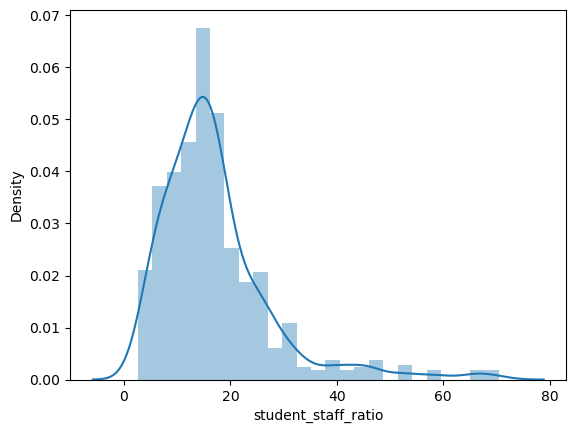

In [16]:
# Extreme values check
sns.distplot(ratings['student_staff_ratio'], bins=25)

In [17]:
ratings['student_staff_ratio'].mean()

17.10764331210191

In [18]:
ratings['student_staff_ratio'].median()

15.2

In [19]:
ratings['student_staff_ratio'].max()

70.4

C:\Users\Lawrence\AppData\Local\Temp\ipykernel_11680\4008536298.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ratings['score'], bins=25)
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.

<Axes: xlabel='score', ylabel='Density'>

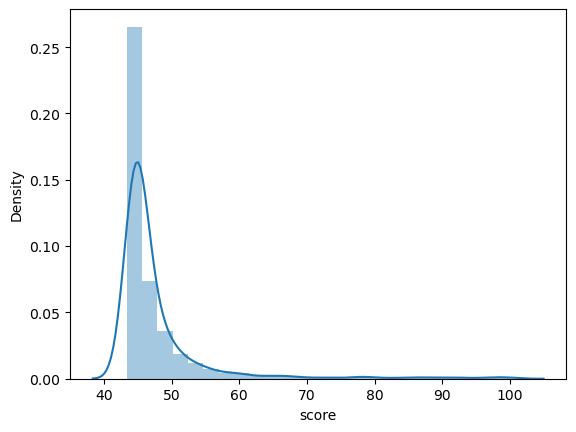

In [20]:
sns.distplot(ratings['score'], bins=25)

In [21]:
ratings['score'].mean()

47.79839545454546

In [22]:
ratings['score'].median()

45.1

In [23]:
ratings['score'].max()

100.0

## Data exploration for regression analysis

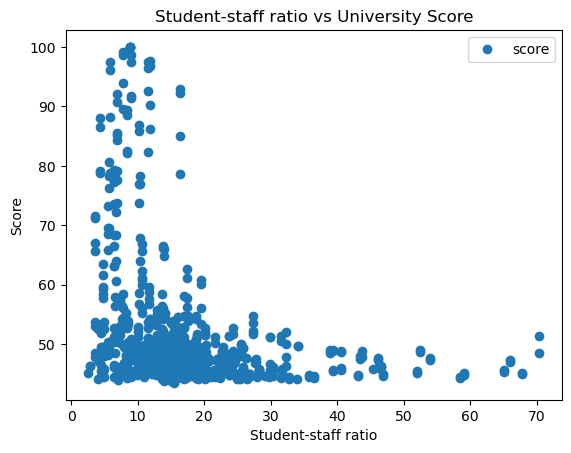

In [24]:
# Create scatterplots to explore data visually
# Student staff ratio vs. University Score
ratings.plot(x = 'student_staff_ratio', y='score',style='o')
plt.title('Student-staff ratio vs University Score')  
plt.xlabel('Student-staff ratio')  
plt.ylabel('Score')  
plt.show()

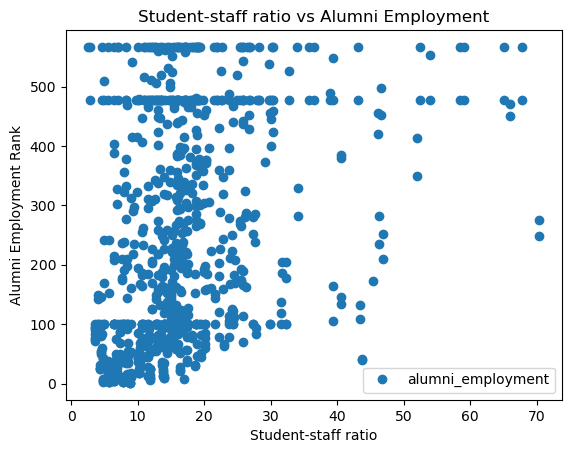

In [25]:
# Scatterplot - Student staff ratio vs. Alumni Employment
ratings.plot(x = 'student_staff_ratio', y='alumni_employment',style='o')
plt.title('Student-staff ratio vs Alumni Employment')  
plt.xlabel('Student-staff ratio')  
plt.ylabel('Alumni Employment Rank')  
plt.show()

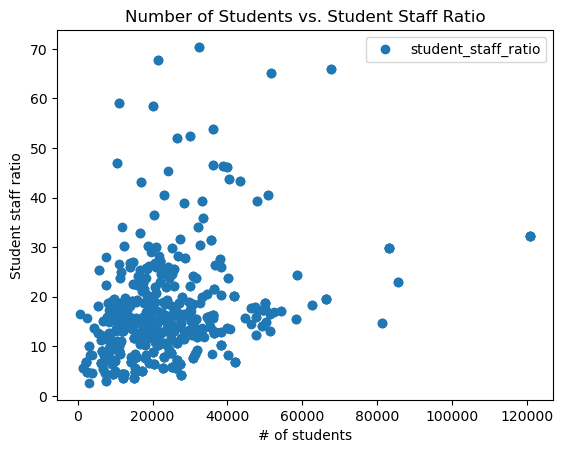

In [26]:
# Scatterplot - Number of Students vs. Student Staff Ratio
ratings.plot(x = 'num_students', y='student_staff_ratio',style='o')
plt.title('Number of Students vs. Student Staff Ratio')  
plt.xlabel('# of students')  
plt.ylabel('Student staff ratio')  
plt.show()

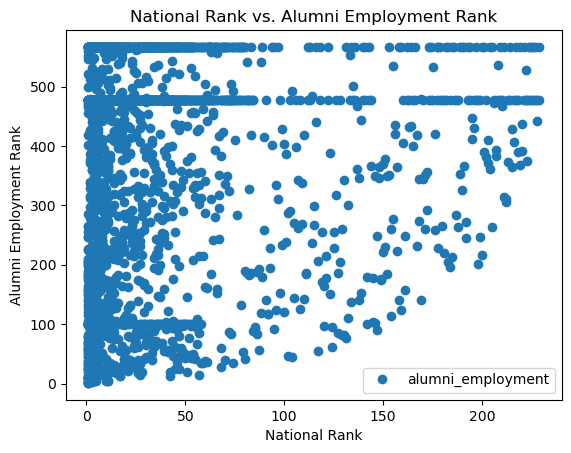

In [27]:
# Scatterplot - National Rank vs. Alumni Employment Rank
ratings.plot(x = 'national_rank', y='alumni_employment',style='o')
plt.title('National Rank vs. Alumni Employment Rank')  
plt.xlabel('National Rank')  
plt.ylabel('Alumni Employment Rank')  
plt.show()

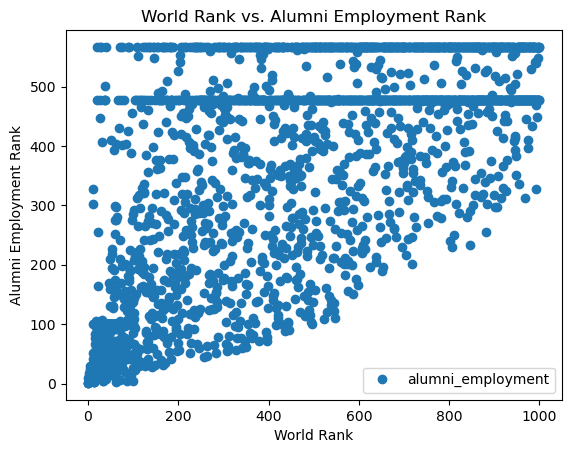

In [28]:
# Scatterplot - World Rank vs. Alumni Employment Rank
ratings.plot(x = 'world_rank', y='alumni_employment',style='o')
plt.title('World Rank vs. Alumni Employment Rank')  
plt.xlabel('World Rank')  
plt.ylabel('Alumni Employment Rank')  
plt.show()

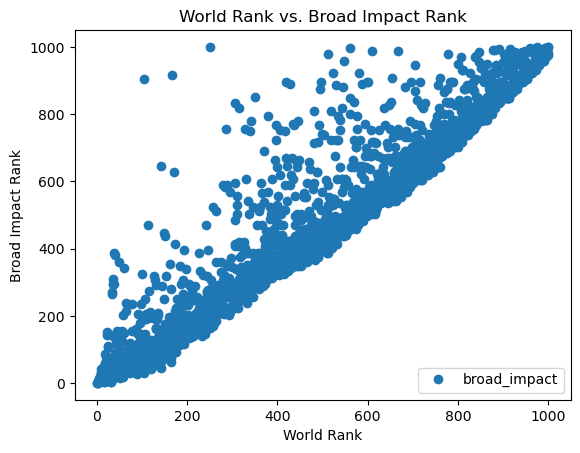

In [29]:
# Scatterplot - World Rank vs. Broad Impact Rank
ratings.plot(x = 'world_rank', y='broad_impact',style='o')
plt.title('World Rank vs. Broad Impact Rank')  
plt.xlabel('World Rank')  
plt.ylabel('Broad Impact Rank')  
plt.show()

## Hypothesis to test
Universities with smaller student staff ratios are more likely to have high (low number) rank in alumni employment.

## Prepare data for analysis

In [30]:
# Since a test variable has missing values, we need to drop those rows for this test.

ratings_2 = ratings.dropna(subset = ['student_staff_ratio'])
ratings_2.isnull().sum()

world_rank                    0
institution                   0
country                       0
national_rank                 0
quality_of_education          0
alumni_employment             0
quality_of_faculty            0
publications                  0
influence                     0
citations                     0
broad_impact                144
patents                       0
score                         0
year                          0
student_staff_ratio           0
Score category                0
num_students                  0
international_students_%      2
dtype: int64

In [31]:
ratings_2.shape

(785, 18)

In [32]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = ratings_2['student_staff_ratio'].values.reshape(-1,1)
y = ratings_2['alumni_employment'].values.reshape(-1,1)

In [33]:
X

array([[ 8.9],
       [ 9. ],
       [ 7.8],
       [11.8],
       [ 6.9],
       [ 8.4],
       [11.6],
       [ 4.4],
       [ 5.9],
       [16.4],
       [ 6.9],
       [10.2],
       [ 6.5],
       [ 5.7],
       [ 3.6],
       [ 5.6],
       [10.3],
       [ 6.5],
       [10.7],
       [ 6.8],
       [ 4.8],
       [11.7],
       [17.4],
       [10.7],
       [ 7.8],
       [13.8],
       [19.5],
       [ 7.3],
       [16.9],
       [27.3],
       [13.7],
       [13.1],
       [12.9],
       [13.9],
       [16.1],
       [16.1],
       [12.7],
       [ 4.5],
       [18.7],
       [24.4],
       [ 9. ],
       [ 6.6],
       [ 3.6],
       [14.1],
       [ 4.8],
       [ 8.6],
       [15. ],
       [10.1],
       [17.6],
       [ 8.4],
       [11.5],
       [ 7.9],
       [13.9],
       [15.3],
       [32.3],
       [ 6.4],
       [ 5. ],
       [29.9],
       [ 4.5],
       [10.2],
       [17.1],
       [10. ],
       [20.1],
       [ 6.5],
       [15.1],
       [31.5],
       [18

In [34]:
y

array([[  9],
       [ 17],
       [ 11],
       [ 24],
       [ 29],
       [ 14],
       [ 28],
       [ 31],
       [ 21],
       [ 52],
       [ 26],
       [ 42],
       [ 16],
       [ 19],
       [ 77],
       [ 38],
       [ 59],
       [101],
       [ 93],
       [ 75],
       [ 43],
       [ 73],
       [ 78],
       [101],
       [101],
       [ 32],
       [101],
       [ 86],
       [101],
       [101],
       [ 91],
       [ 81],
       [101],
       [101],
       [ 88],
       [101],
       [101],
       [ 54],
       [101],
       [101],
       [ 53],
       [ 13],
       [ 72],
       [101],
       [  3],
       [101],
       [101],
       [ 37],
       [101],
       [101],
       [101],
       [101],
       [ 34],
       [101],
       [101],
       [101],
       [101],
       [101],
       [ 97],
       [ 50],
       [101],
       [ 41],
       [ 67],
       [101],
       [101],
       [101],
       [101],
       [101],
       [101],
       [101],
       [101],
      

In [35]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Regression analysis

In [36]:
# Create a regression object.

regression = LinearRegression()  

In [37]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [38]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

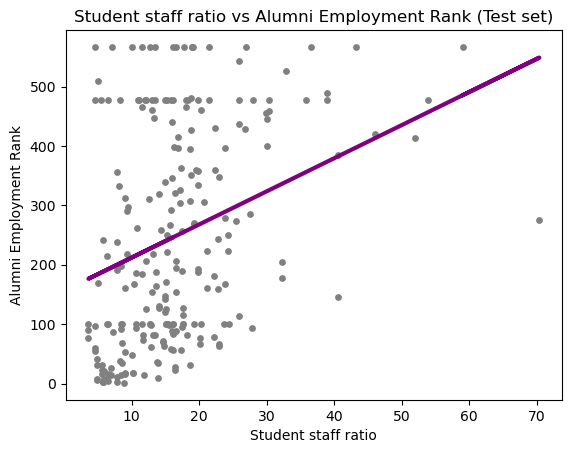

In [39]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='purple', linewidth =3)
plot_test.title('Student staff ratio vs Alumni Employment Rank (Test set)')
plot_test.xlabel('Student staff ratio')
plot_test.ylabel('Alumni Employment Rank')
plot_test.show()

The line does only seems to fit the data slightly. There are a lot of points, especially when student staff ratios are smaller, that fall far below or above the line.

In [40]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [41]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[5.57824833]]
Mean squared error:  28373.531614206364
R2 score:  0.1425766238319245


In [42]:
y_predicted

array([[245.02972566],
       [188.13159265],
       [267.342719  ],
       [241.12495183],
       [457.00316238],
       [176.41727114],
       [252.2814485 ],
       [311.41088084],
       [192.03636648],
       [229.41063032],
       [241.68277666],
       [213.23371015],
       [280.730515  ],
       [234.98887866],
       [240.00930216],
       [248.37667466],
       [206.53981215],
       [206.53981215],
       [298.02308484],
       [266.78489417],
       [261.76447066],
       [252.83927333],
       [261.20664583],
       [240.00930216],
       [188.13159265],
       [197.05678998],
       [300.81220901],
       [242.79842633],
       [246.14537533],
       [248.37667466],
       [220.48543299],
       [260.09099616],
       [300.81220901],
       [208.21328665],
       [228.85280549],
       [239.45147733],
       [265.11141967],
       [224.39020682],
       [209.32893632],
       [227.17933099],
       [214.34935982],
       [187.57376781],
       [203.19286315],
       [216

In [43]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,478,245.029726
1,3,188.131593
2,188,267.342719
3,250,241.124952
4,478,457.003162
5,77,176.417271
6,304,252.281448
7,93,311.410881
8,101,192.036366
9,81,229.410630


The model appears to have performed pretty terribly. The mean squared error is incredibly high and the R2 score is incredibly low (at 0.14, it is close to 0). There could be a few points that could possibly be outliers, but there are also clusters of points that fall far from the line.  There could be data bias from only having about 700 points. The dependent variable being ordinal data might also result in a loss of some granularity.

In [44]:
# Export dataset
ratings.to_pickle(os.path.join(path, '02 Project Datasets', 'Prepared Data', 'uni_ratings_v2.pkl'))